In [1]:
# importing requyired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Laoding bike rental Data Set 
Data_loading=r'c:/Users/srika/New folder/Courses/Inderactive Data_/Final Project/Esha final Project/Bike rentl promotions/SeoulBikeData.csv'
df = pd.read_csv(Data_loading, encoding='ISO-8859-1')
#Reviewing Data Quality
#==========================
df.info() # overview of data types and null counts 
df.isnull().sum() # checking for missing values 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [3]:
df.describe(include="all").T
# converting Date object
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

df["Weekday"]=df["Date"].dt.day_name()
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year

df.drop("Date",axis=1,inplace=True)

In [4]:

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Weekday                    8760 non-null   objec

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017


Trying to visualize the relationship between the temparature and the bike rentals that can further deepen the analysis.

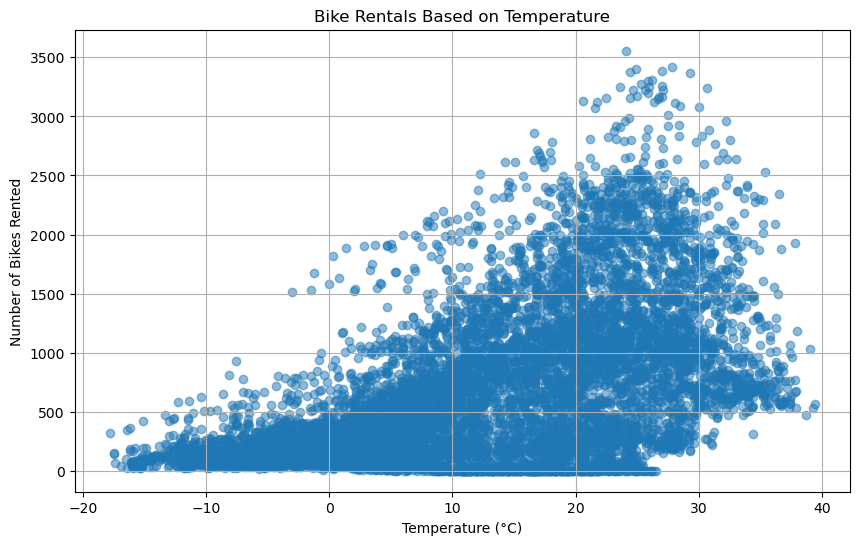

In [5]:


# Scatter plot to visualize the relationship between temperature and rented bike count
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature(°C)'], df['Rented Bike Count'], alpha=0.5)
plt.title("Bike Rentals Based on Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Bikes Rented")
plt.grid(True)
plt.show()


Differentiating the te

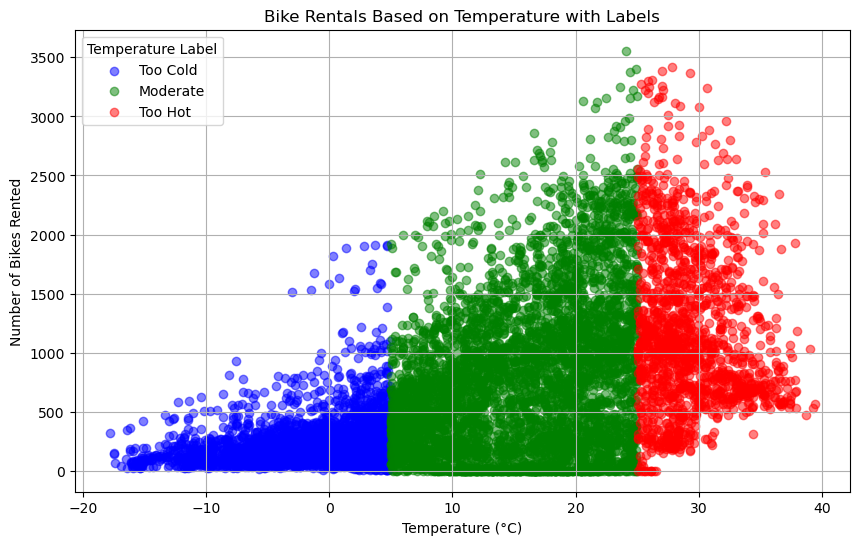

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


# Define temperature thresholds for labeling
def temperature_label(temp):
    if temp < 5:
        return "Too Cold"
    elif temp > 25:
        return "Too Hot"
    else:
        return "Moderate"

# Apply the function to create a new column in the dataset
df['Temperature Label'] = df['Temperature(°C)'].apply(temperature_label)

# Static scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
colors = {'Too Cold': 'blue', 'Moderate': 'green', 'Too Hot': 'red'}
for label, color in colors.items():
    subset = df[df['Temperature Label'] == label]
    plt.scatter(subset['Temperature(°C)'], subset['Rented Bike Count'], 
                alpha=0.5, label=label, color=color)

plt.title("Bike Rentals Based on Temperature with Labels")
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Bikes Rented")
plt.legend(title="Temperature Label")
plt.grid(True)
plt.show()



In [7]:
import pandas as pd
import plotly.express as px

# Sample DataFrame creation for demonstration (replace this with your actual dataset)
# df = pd.DataFrame({'Temperature(°C)': [1, 10, 15, 28, 5], 'Rented Bike Count': [100, 150, 200, 250, 300]})

# Define temperature thresholds for labeling
def temperature_label(temp):
    if temp < 5:
        return "Too Cold"
    elif temp > 25:
        return "Too Hot"
    else:
        return "Moderate"

# Apply the function to create a new column in the dataset
df['Temperature Label'] = df['Temperature(°C)'].apply(temperature_label)

# Interactive scatter plot using Plotly
fig = px.scatter(
    df, 
    x='Temperature(°C)', 
    y='Rented Bike Count', 
    color='Temperature Label',
    color_discrete_map={'Too Cold': 'blue', 'Moderate': 'green', 'Too Hot': 'red'},
    title="Bike Rentals Based on Temperature with Labels",
    labels={ "Rented Bike Count": "Number of Bikes Rented"}
)

# Display the figure with hover tooltips
fig.show()


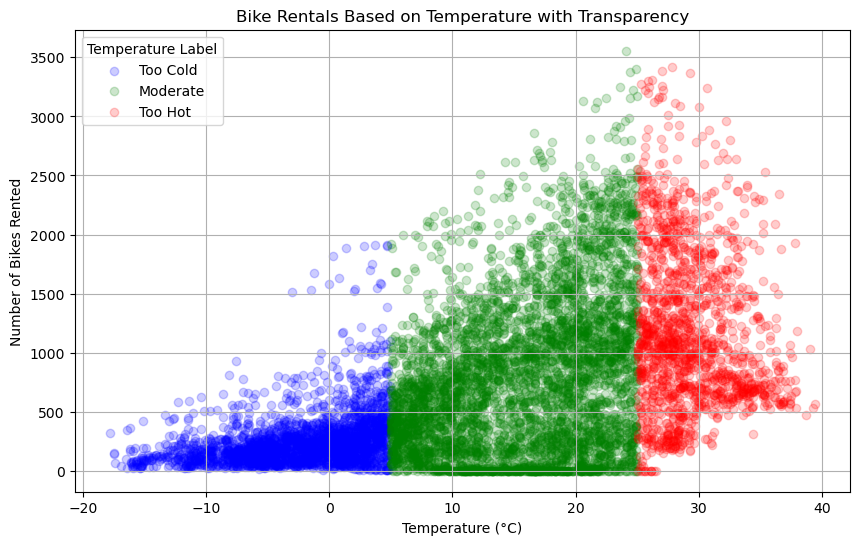

In [8]:
import numpy as np

# 1. Scatter Plot with Transparency (Alpha)
plt.figure(figsize=(10, 6))
for label, color in colors.items():
    subset = df[df['Temperature Label'] == label]
    plt.scatter(subset['Temperature(°C)'], subset['Rented Bike Count'], 
                alpha=0.2, label=label, color=color)
plt.title("Bike Rentals Based on Temperature with Transparency")
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Bikes Rented")
plt.legend(title="Temperature Label")
plt.grid(True)
plt.show()



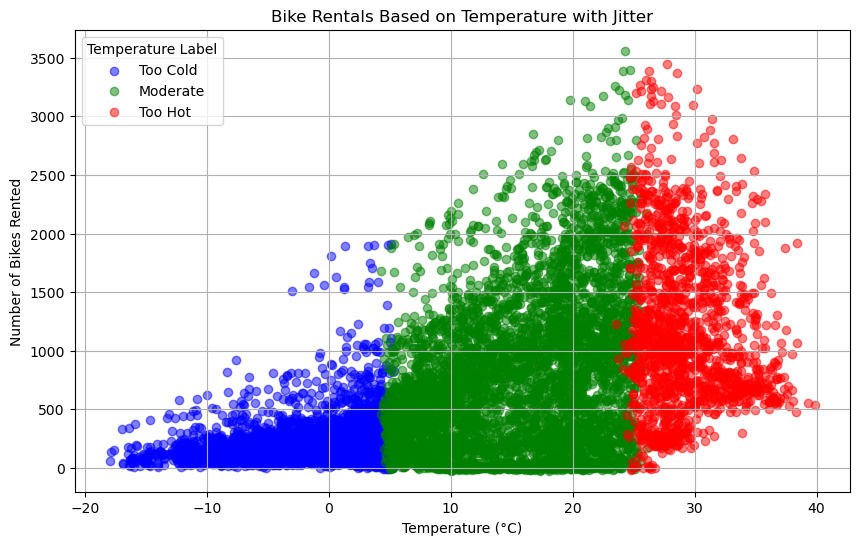

In [9]:
# 2. Scatter Plot with Jitter
plt.figure(figsize=(10, 6))
for label, color in colors.items():
    subset = df[df['Temperature Label'] == label]
    # Adding random jitter to temperature and rentals
    jittered_temp = subset['Temperature(°C)'] + np.random.normal(0, 0.5, size=len(subset))
    jittered_rentals = subset['Rented Bike Count'] + np.random.normal(0, 10, size=len(subset))
    plt.scatter(jittered_temp, jittered_rentals, alpha=0.5, label=label, color=color)
plt.title("Bike Rentals Based on Temperature with Jitter")
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Bikes Rented")
plt.legend(title="Temperature Label")
plt.grid(True)
plt.show()



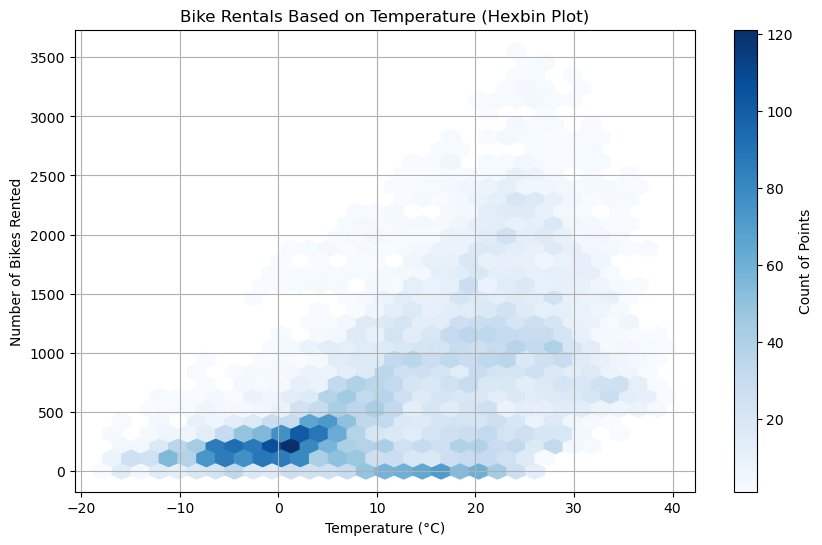

In [10]:
# 3. Hexbin Plot
plt.figure(figsize=(10, 6))
plt.hexbin(df['Temperature(°C)'], df['Rented Bike Count'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count of Points')
plt.title("Bike Rentals Based on Temperature (Hexbin Plot)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Bikes Rented")
plt.grid(True)
plt.show()

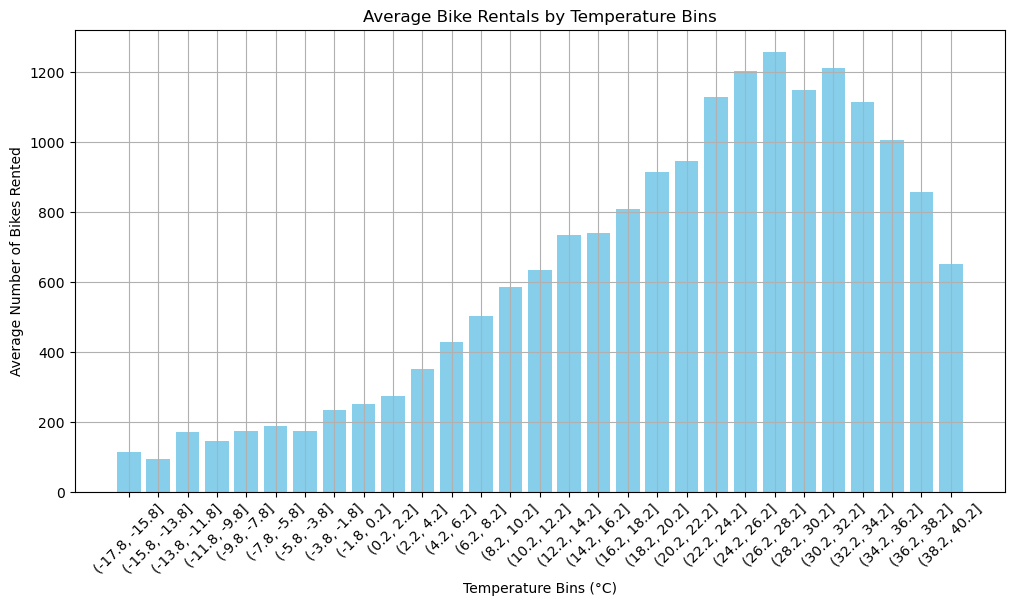

In [11]:
# 4. Aggregated Bar Plot by Temperature Bins
# Define bins and labels
temperature_bins = np.arange(df['Temperature(°C)'].min(), df['Temperature(°C)'].max() + 2, 2)
df['Temp Binned'] = pd.cut(df['Temperature(°C)'], bins=temperature_bins)
# Aggregate mean bike rentals for each temperature bin
binned_data = df.groupby('Temp Binned')['Rented Bike Count'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(binned_data['Temp Binned'].astype(str), binned_data['Rented Bike Count'], color='skyblue')
plt.title("Average Bike Rentals by Temperature Bins")
plt.xlabel("Temperature Bins (°C)")
plt.ylabel("Average Number of Bikes Rented")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



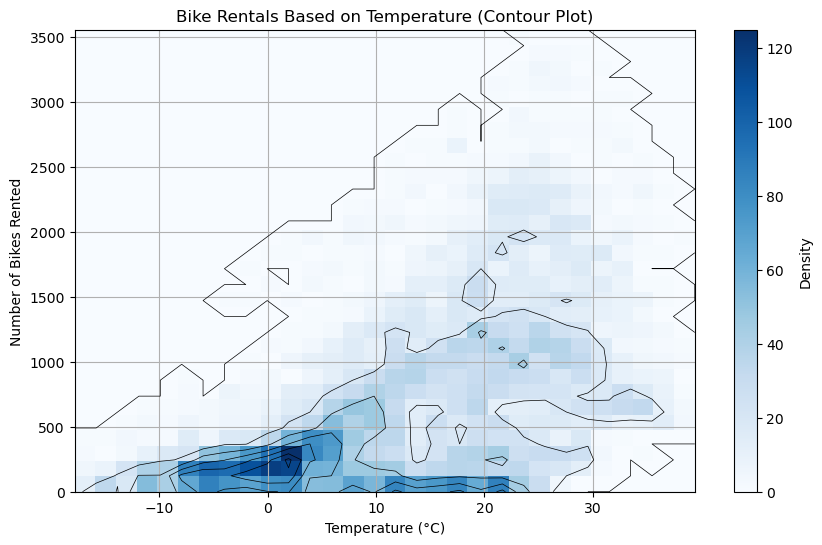

In [12]:
# 5. Contour Plot
plt.figure(figsize=(10, 6))
plt.hist2d(df['Temperature(°C)'], df['Rented Bike Count'], bins=30, cmap='Blues')
plt.colorbar(label='Density')
plt.contour(np.histogram2d(df['Temperature(°C)'], df['Rented Bike Count'], bins=30)[0].T, 
            extent=[df['Temperature(°C)'].min(), df['Temperature(°C)'].max(), 
                    df['Rented Bike Count'].min(), df['Rented Bike Count'].max()], 
            colors='black', linewidths=0.5)
plt.title("Bike Rentals Based on Temperature (Contour Plot)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Bikes Rented")
plt.grid(True)
plt.show()

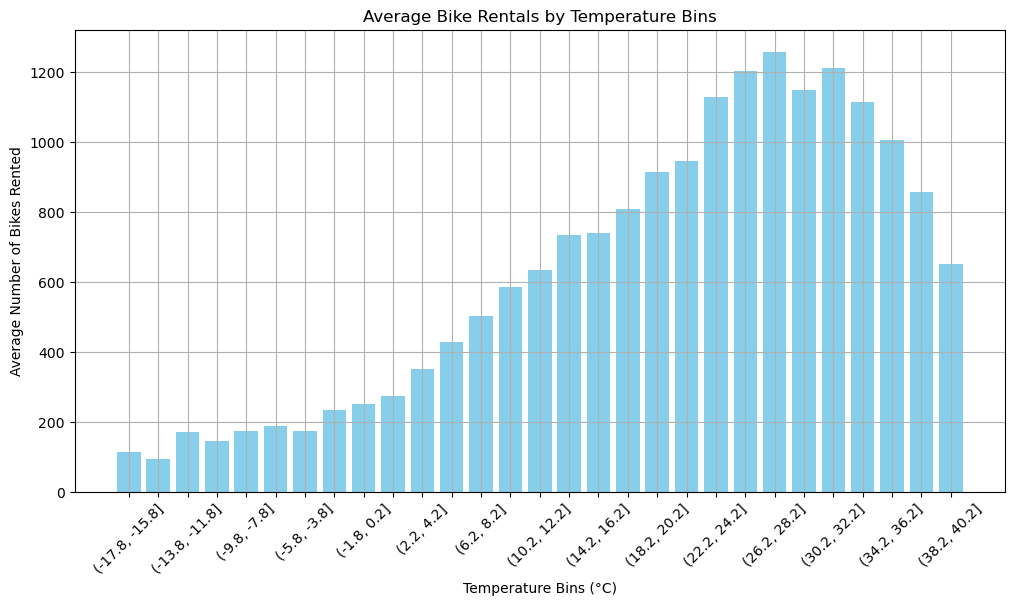

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define bins and labels
temperature_bins = np.arange(df['Temperature(°C)'].min(), df['Temperature(°C)'].max() + 2, 2)
df['Temp Binned'] = pd.cut(df['Temperature(°C)'], bins=temperature_bins)

# Aggregate mean bike rentals for each temperature bin
binned_data = df.groupby('Temp Binned')['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(binned_data['Temp Binned'].astype(str), binned_data['Rented Bike Count'], color='skyblue')
plt.title("Average Bike Rentals by Temperature Bins")
plt.xlabel("Temperature Bins (°C)")
plt.ylabel("Average Number of Bikes Rented")

# Rotate x-ticks and reduce the number of labels shown
plt.xticks(rotation=45)
for i, label in enumerate(plt.gca().get_xticklabels()):
    if i % 2 != 0:  # Show every other tick
        label.set_visible(False)

plt.grid(True)
plt.show()


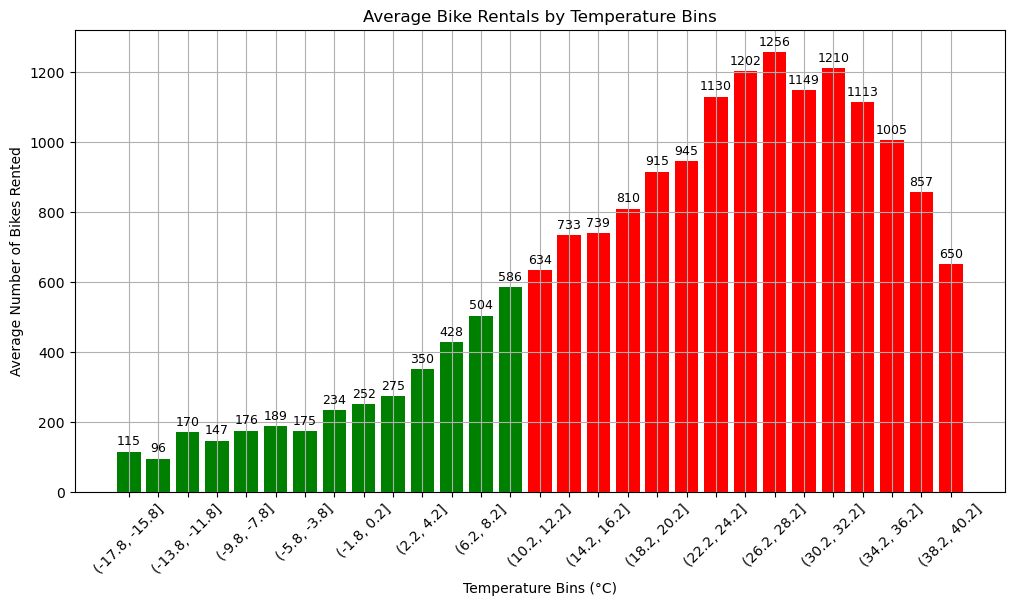

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define bins and labels
temperature_bins = np.arange(df['Temperature(°C)'].min(), df['Temperature(°C)'].max() + 2, 2)
df['Temp Binned'] = pd.cut(df['Temperature(°C)'], bins=temperature_bins)

# Aggregate mean bike rentals for each temperature bin
binned_data = df.groupby('Temp Binned')['Rented Bike Count'].mean().reset_index()

# Define colors based on high and low thresholds
average_rentals = binned_data['Rented Bike Count']
colors = ['green' if val < average_rentals.mean() else 'red' for val in average_rentals]

plt.figure(figsize=(12, 6))
bars = plt.bar(binned_data['Temp Binned'].astype(str), average_rentals, color=colors)
plt.title("Average Bike Rentals by Temperature Bins")
plt.xlabel("Temperature Bins (°C)")
plt.ylabel("Average Number of Bikes Rented")

# Add data labels on top of each bar
for bar, label in zip(bars, average_rentals):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 10,  # Position label slightly above the bar
        f'{label:.0f}', ha='center', va='bottom', fontsize=9, color='black'
    )

# Rotate x-ticks and reduce the number of labels shown
plt.xticks(rotation=45)
for i, label in enumerate(plt.gca().get_xticklabels()):
    if i % 2 != 0:  # Show every other tick
        label.set_visible(False)

plt.grid(True)
plt.show()


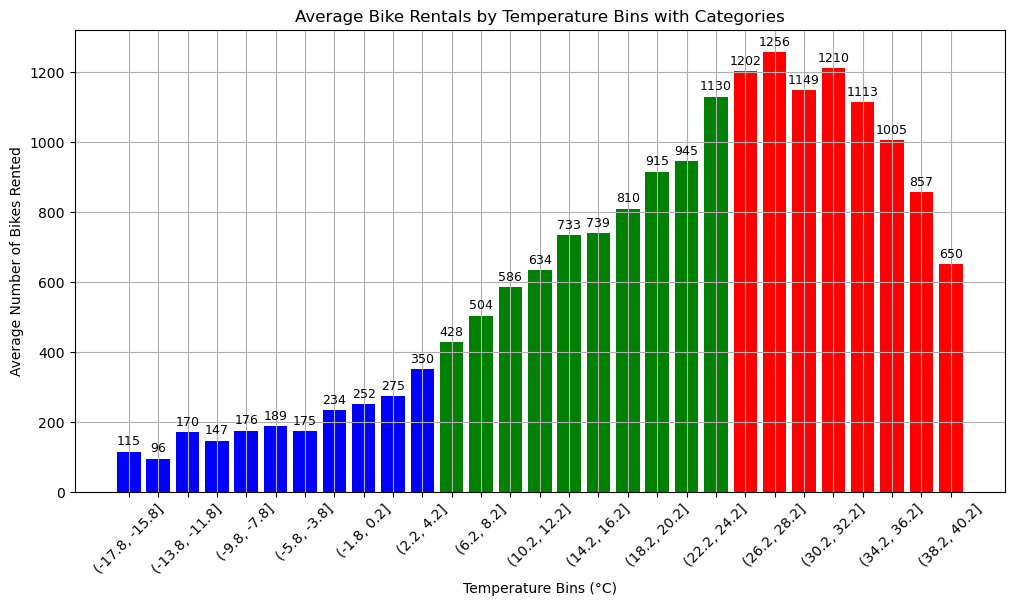

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define bins and labels based on temperature thresholds
temperature_bins = np.arange(df['Temperature(°C)'].min(), df['Temperature(°C)'].max() + 2, 2)
df['Temp Binned'] = pd.cut(df['Temperature(°C)'], bins=temperature_bins)

# Define temperature categories
def temperature_category(temp):
    if temp < 5:
        return "Too Cold"
    elif temp > 25:
        return "Too Hot"
    else:
        return "Moderate"

# Assign each bin a temperature category based on the midpoint of the bin
binned_data = df.groupby('Temp Binned')['Rented Bike Count'].mean().reset_index()
binned_data['Category'] = binned_data['Temp Binned'].apply(
    lambda x: temperature_category(x.mid)  # Midpoint of each bin
)

# Define colors based on categories
category_colors = {
    "Too Cold": 'blue',
    "Moderate": 'green',
    "Too Hot": 'red'
}
colors = [category_colors[cat] for cat in binned_data['Category']]

# Plot the bar chart with color-coded bars
plt.figure(figsize=(12, 6))
bars = plt.bar(binned_data['Temp Binned'].astype(str), binned_data['Rented Bike Count'], color=colors)
plt.title("Average Bike Rentals by Temperature Bins with Categories")
plt.xlabel("Temperature Bins (°C)")
plt.ylabel("Average Number of Bikes Rented")

# Add data labels on top of each bar
for bar, label in zip(bars, binned_data['Rented Bike Count']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 10,  # Position label slightly above the bar
        f'{label:.0f}', ha='center', va='bottom', fontsize=9, color='black'
    )

# Rotate x-ticks and reduce the number of labels shown
plt.xticks(rotation=45)
for i, label in enumerate(plt.gca().get_xticklabels()):
    if i % 2 != 0:  # Show every other tick
        label.set_visible(False)

plt.grid(True)
plt.show()



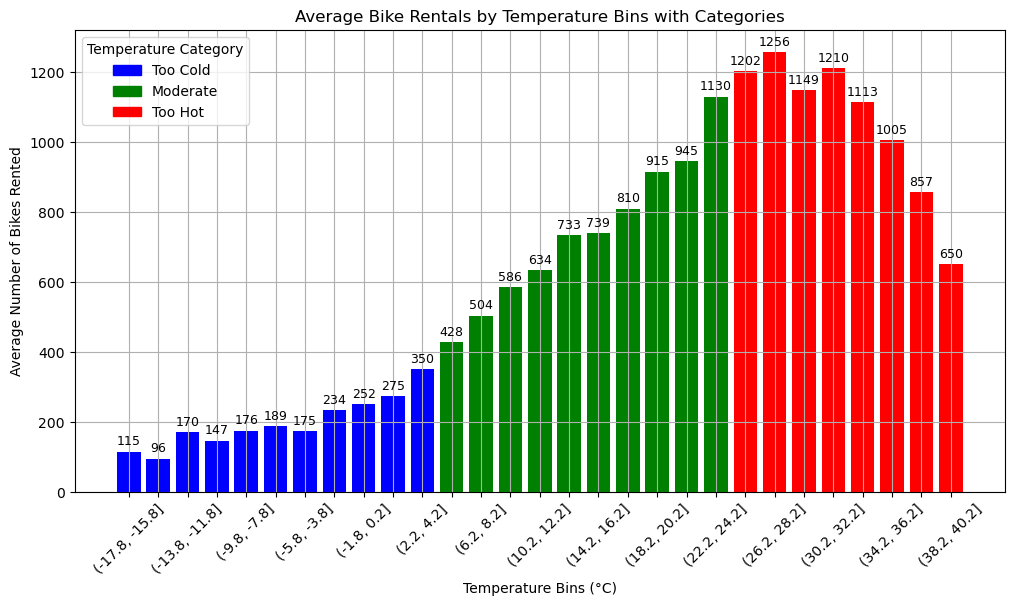

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define bins and labels based on temperature thresholds
temperature_bins = np.arange(df['Temperature(°C)'].min(), df['Temperature(°C)'].max() + 2, 2)
df['Temp Binned'] = pd.cut(df['Temperature(°C)'], bins=temperature_bins)

# Define temperature categories
def temperature_category(temp):
    if temp < 5:
        return "Too Cold"
    elif temp > 25:
        return "Too Hot"
    else:
        return "Moderate"

# Assign each bin a temperature category based on the midpoint of the bin
binned_data = df.groupby('Temp Binned')['Rented Bike Count'].mean().reset_index()
binned_data['Category'] = binned_data['Temp Binned'].apply(
    lambda x: temperature_category(x.mid)  # Midpoint of each bin
)

# Define colors based on categories
category_colors = {
    "Too Cold": 'blue',
    "Moderate": 'green',
    "Too Hot": 'red'
}
colors = [category_colors[cat] for cat in binned_data['Category']]

# Plot the bar chart with color-coded bars
plt.figure(figsize=(12, 6))
bars = plt.bar(binned_data['Temp Binned'].astype(str), binned_data['Rented Bike Count'], color=colors)
plt.title("Average Bike Rentals by Temperature Bins with Categories")
plt.xlabel("Temperature Bins (°C)")
plt.ylabel("Average Number of Bikes Rented")

# Add data labels on top of each bar
for bar, label in zip(bars, binned_data['Rented Bike Count']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 10,  # Position label slightly above the bar
        f'{label:.0f}', ha='center', va='bottom', fontsize=9, color='black'
    )

# Rotate x-ticks and reduce the number of labels shown
plt.xticks(rotation=45)
for i, label in enumerate(plt.gca().get_xticklabels()):
    if i % 2 != 0:  # Show every other tick
        label.set_visible(False)

# Add legend for the color categories
legend_elements = [
    mpatches.Patch(color='blue', label='Too Cold'),
    mpatches.Patch(color='green', label='Moderate'),
    mpatches.Patch(color='red', label='Too Hot')
]
plt.legend(handles=legend_elements, title="Temperature Category")

plt.grid(True)
plt.show()


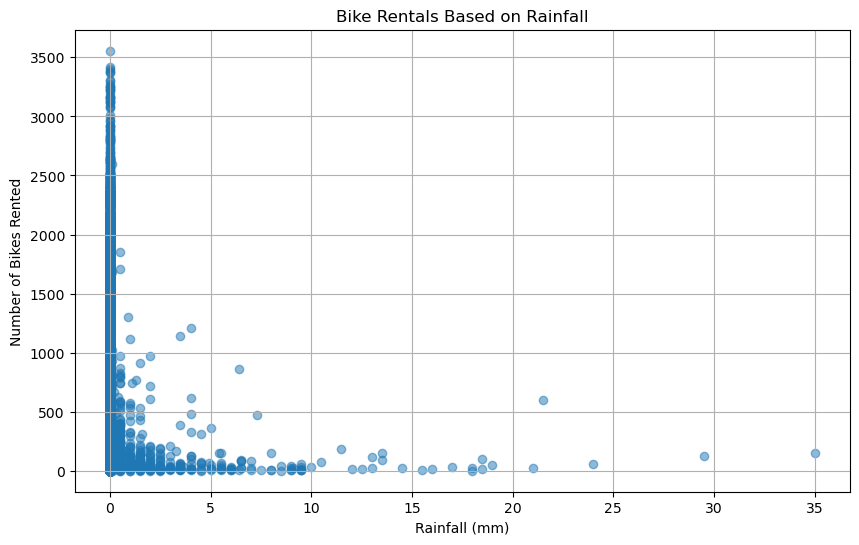

In [17]:
# Re-import necessary libraries and reload the data
import pandas as pd
import matplotlib.pyplot as plt


# Scatter plot to visualize the relationship between rainfall and rented bike count
plt.figure(figsize=(10, 6))
plt.scatter(df['Rainfall(mm)'], df['Rented Bike Count'], alpha=0.5)
plt.title("Bike Rentals Based on Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Number of Bikes Rented")
plt.grid(True)
plt.show()


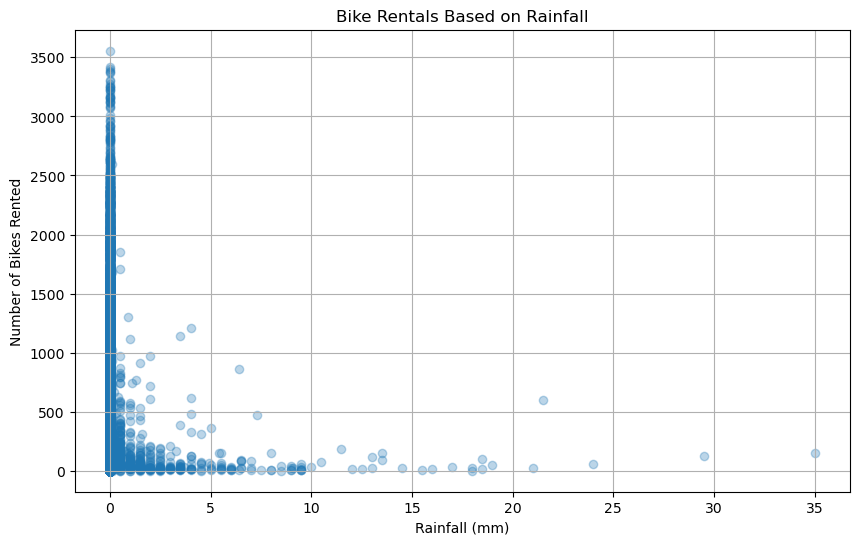

In [18]:
# Re-import necessary libraries and reload the data
import pandas as pd
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between rainfall and rented bike count
plt.figure(figsize=(10, 6))
plt.scatter(df['Rainfall(mm)'], df['Rented Bike Count'], alpha=0.3)  # Lower alpha for more transparency
plt.title("Bike Rentals Based on Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Number of Bikes Rented")
plt.grid(True)
plt.show()



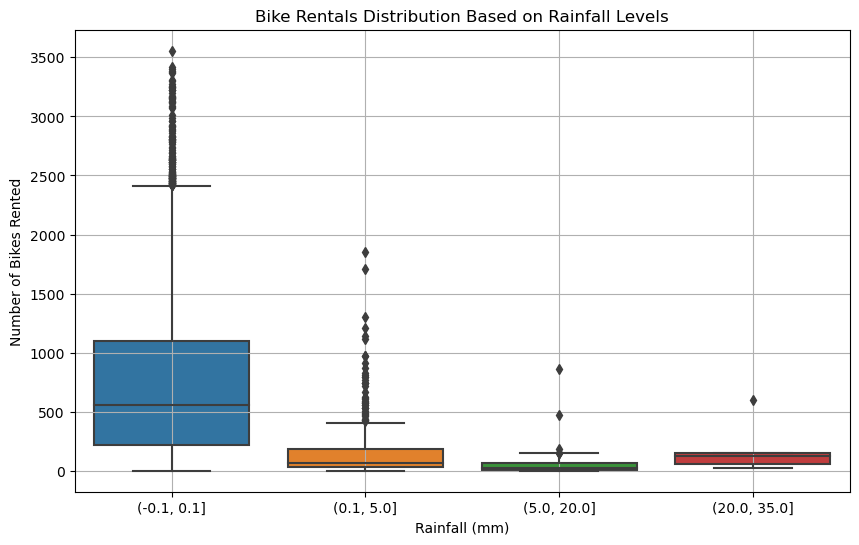

In [19]:
import numpy as np
import seaborn as sns

# 1. Box Plot: Bike Rentals Distribution Based on Rainfall Levels
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df['Rainfall(mm)'], bins=[-0.1, 0.1, 5, 20, df['Rainfall(mm)'].max()]), 
            y=df['Rented Bike Count'])
plt.title("Bike Rentals Distribution Based on Rainfall Levels")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Number of Bikes Rented")
plt.grid(True)
plt.show()



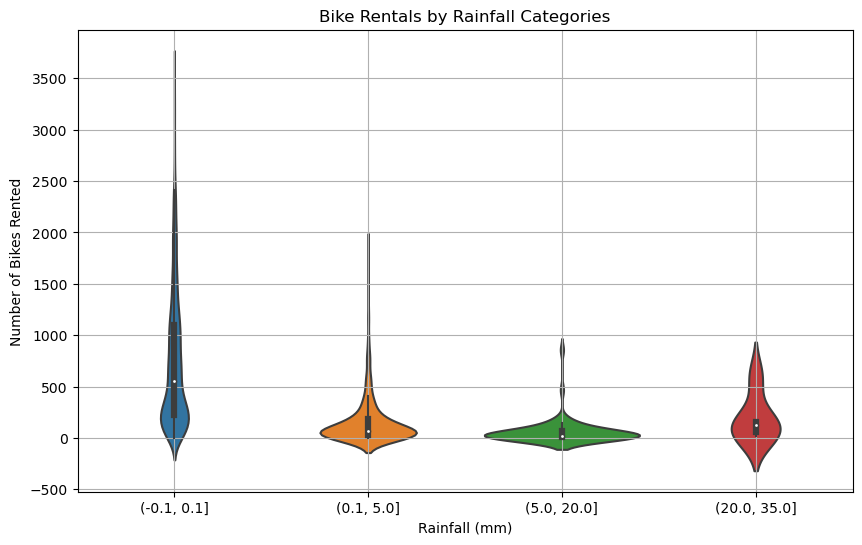

In [20]:
# 2. Violin Plot: Bike Rentals by Rainfall Categories
plt.figure(figsize=(10, 6))
sns.violinplot(x=pd.cut(df['Rainfall(mm)'], bins=[-0.1, 0.1, 5, 20, df['Rainfall(mm)'].max()]), 
               y=df['Rented Bike Count'])
plt.title("Bike Rentals by Rainfall Categories")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Number of Bikes Rented")
plt.grid(True)
plt.show()

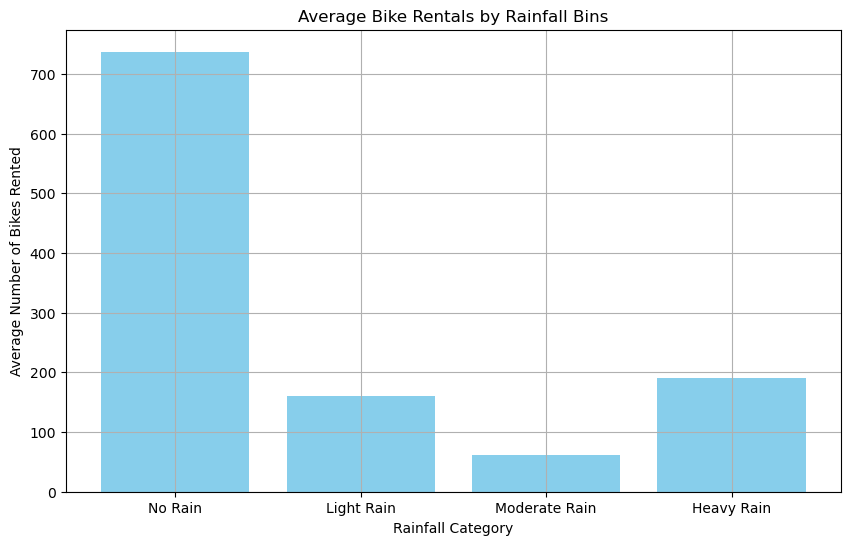

In [21]:
# 3. Bar Plot: Average Bike Rentals by Rainfall Bins
rainfall_bins = [-0.1, 0.1, 5, 20, df['Rainfall(mm)'].max()]
df['Rainfall Binned'] = pd.cut(df['Rainfall(mm)'], bins=rainfall_bins, labels=["No Rain", "Light Rain", "Moderate Rain", "Heavy Rain"])
binned_data = df.groupby('Rainfall Binned')['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(binned_data['Rainfall Binned'], binned_data['Rented Bike Count'], color='skyblue')
plt.title("Average Bike Rentals by Rainfall Bins")
plt.xlabel("Rainfall Category")
plt.ylabel("Average Number of Bikes Rented")
plt.grid(True)
plt.show()



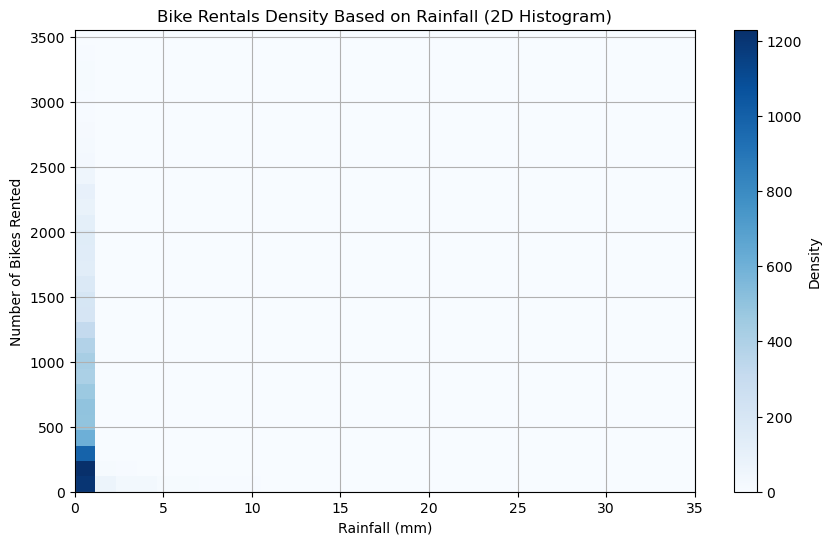

In [22]:
# 4. 2D Histogram / Heatmap: Rainfall and Bike Rentals Density
plt.figure(figsize=(10, 6))
plt.hist2d(df['Rainfall(mm)'], df['Rented Bike Count'], bins=30, cmap='Blues')
plt.colorbar(label='Density')
plt.title("Bike Rentals Density Based on Rainfall (2D Histogram)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Number of Bikes Rented")
plt.grid(True)
plt.show()

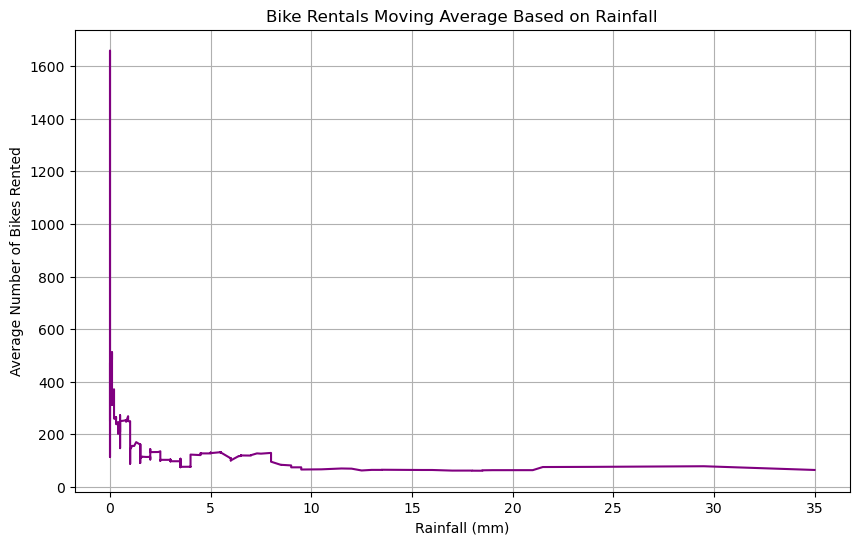

In [23]:
# 5. Line Plot with Moving Average: Rentals by Rainfall
sorted_data = df.sort_values(by='Rainfall(mm)')
sorted_data['Moving Average'] = sorted_data['Rented Bike Count'].rolling(window=50, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(sorted_data['Rainfall(mm)'], sorted_data['Moving Average'], color='purple')
plt.title("Bike Rentals Moving Average Based on Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Average Number of Bikes Rented")
plt.grid(True)
plt.show()

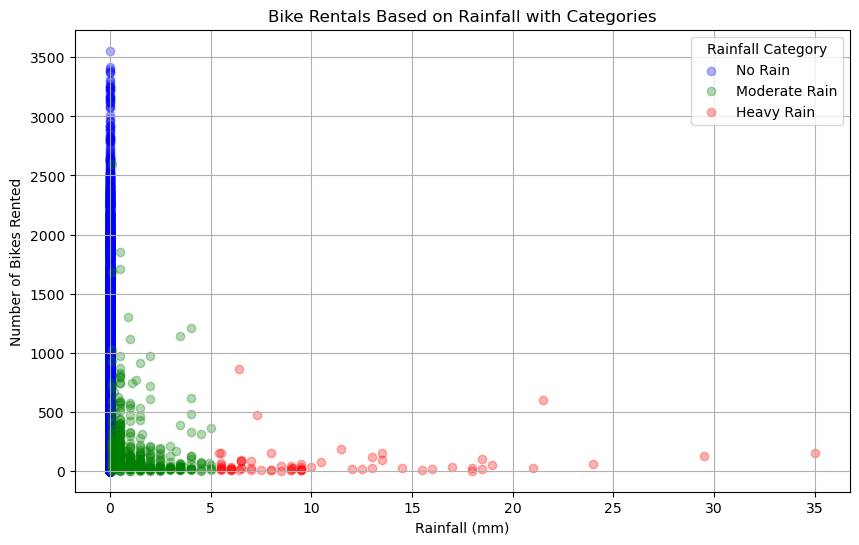

In [24]:
# Define categories for rainfall levels
def rainfall_category(rainfall):
    if rainfall == 0:
        return "No Rain"
    elif rainfall <= 5:
        return "Moderate Rain"
    else:
        return "Heavy Rain"

# Apply the function to create a new column in the dataset
df['Rainfall Category'] = df['Rainfall(mm)'].apply(rainfall_category)

# Scatter plot with color differentiation based on rainfall categories
plt.figure(figsize=(10, 6))
rainfall_colors = {'No Rain': 'blue', 'Moderate Rain': 'green', 'Heavy Rain': 'red'}
for category, color in rainfall_colors.items():
    subset = df[df['Rainfall Category'] == category]
    plt.scatter(subset['Rainfall(mm)'], subset['Rented Bike Count'], alpha=0.3, label=category, color=color)

plt.title("Bike Rentals Based on Rainfall with Categories")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Number of Bikes Rented")
plt.legend(title="Rainfall Category")
plt.grid(True)
plt.show()


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   int64   
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  Weekday                    8760 n

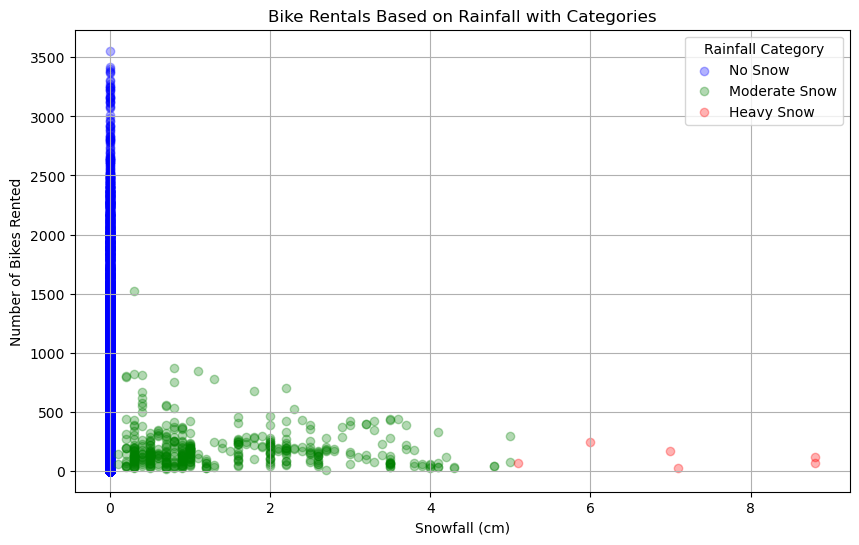

In [26]:
# Define categories for rainfall levels
def rainfall_category(rainfall):
    if rainfall == 0:
        return "No Snow"
    elif rainfall <= 5:
        return "Moderate Snow"
    else:
        return "Heavy Snow"

# Apply the function to create a new column in the dataset
df['Rainfall Category'] = df['Snowfall (cm)'].apply(rainfall_category)

# Scatter plot with color differentiation based on rainfall categories
plt.figure(figsize=(10, 6))
rainfall_colors = {'No Snow': 'blue', 'Moderate Snow': 'green', 'Heavy Snow': 'red'}
for category, color in rainfall_colors.items():
    subset = df[df['Rainfall Category'] == category]
    plt.scatter(subset['Snowfall (cm)'], subset['Rented Bike Count'], alpha=0.3, label=category, color=color)

plt.title("Bike Rentals Based on Rainfall with Categories")
plt.xlabel("Snowfall (cm)")
plt.ylabel("Number of Bikes Rented")
plt.legend(title="Rainfall Category")
plt.grid(True)
plt.show()

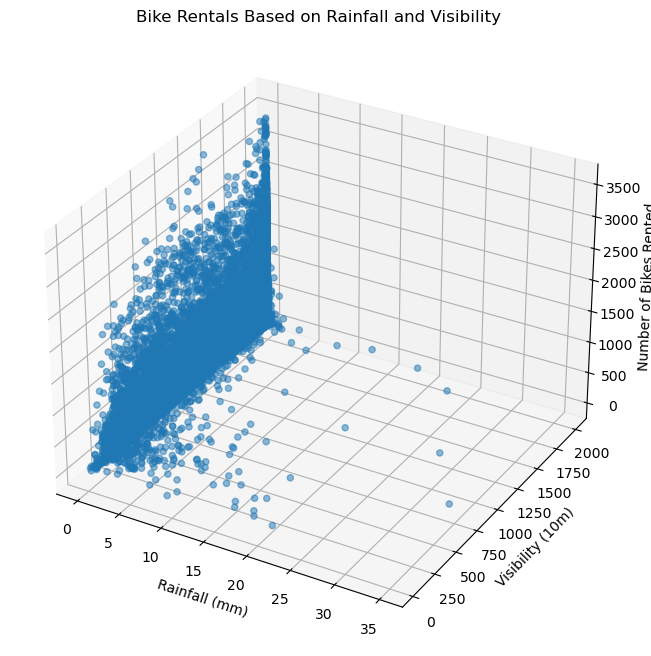

In [27]:
from mpl_toolkits.mplot3d import Axes3D

# 1. 3D Scatter Plot: Bike Rentals based on Rainfall and Visibility
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting points in the 3D space
ax.scatter(df['Rainfall(mm)'], df['Visibility (10m)'], df['Rented Bike Count'], alpha=0.5)

# Labeling the axes
ax.set_title("Bike Rentals Based on Rainfall and Visibility")
ax.set_xlabel("Rainfall (mm)")
ax.set_ylabel("Visibility (10m)")
ax.set_zlabel("Number of Bikes Rented")

plt.show()

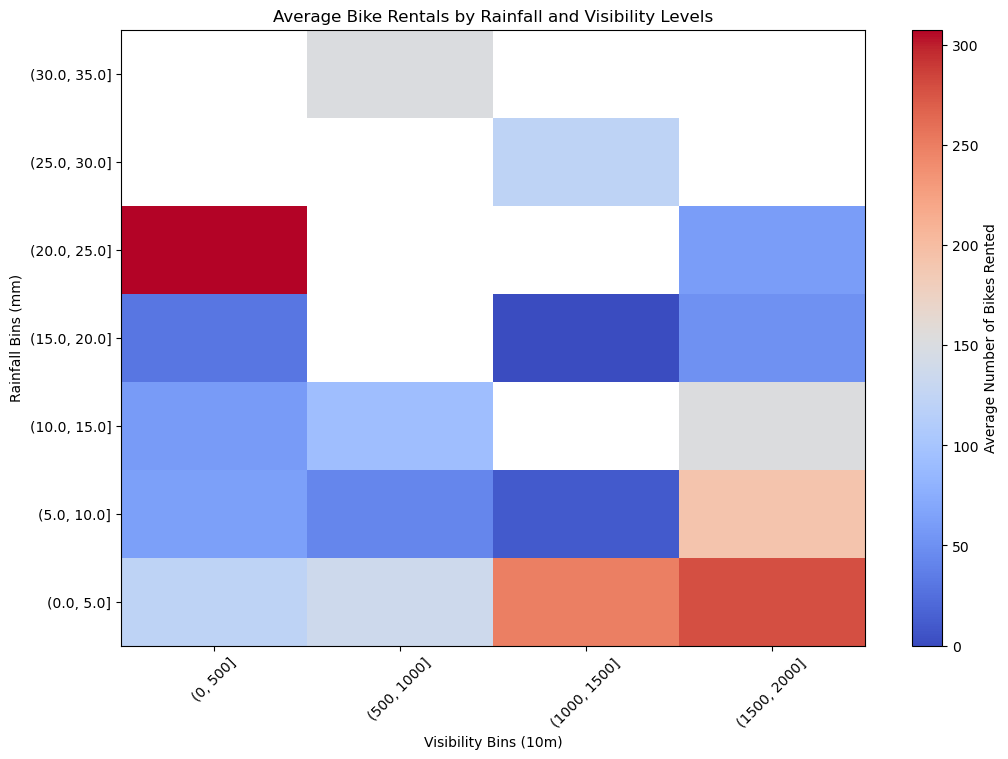

In [28]:
# 2. 2D Heatmap: Aggregated Rentals by Binned Rainfall and Visibility Levels
# Define bins for rainfall and visibility
rainfall_bins = np.arange(0, df['Rainfall(mm)'].max() + 5, 5)
visibility_bins = np.arange(0, df['Visibility (10m)'].max() + 500, 500)

# Bin the data
df['Rainfall Binned'] = pd.cut(df['Rainfall(mm)'], bins=rainfall_bins)
df['Visibility Binned'] = pd.cut(df['Visibility (10m)'], bins=visibility_bins)

# Group and aggregate rentals by binned rainfall and visibility
heatmap_data = df.groupby(['Rainfall Binned', 'Visibility Binned'])['Rented Bike Count'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='coolwarm', origin='lower')
plt.colorbar(label='Average Number of Bikes Rented')
plt.title("Average Bike Rentals by Rainfall and Visibility Levels")
plt.xlabel("Visibility Bins (10m)")
plt.ylabel("Rainfall Bins (mm)")
plt.xticks(ticks=np.arange(len(heatmap_data.columns)), labels=heatmap_data.columns, rotation=45)
plt.yticks(ticks=np.arange(len(heatmap_data.index)), labels=heatmap_data.index)
plt.grid(False)
plt.show()

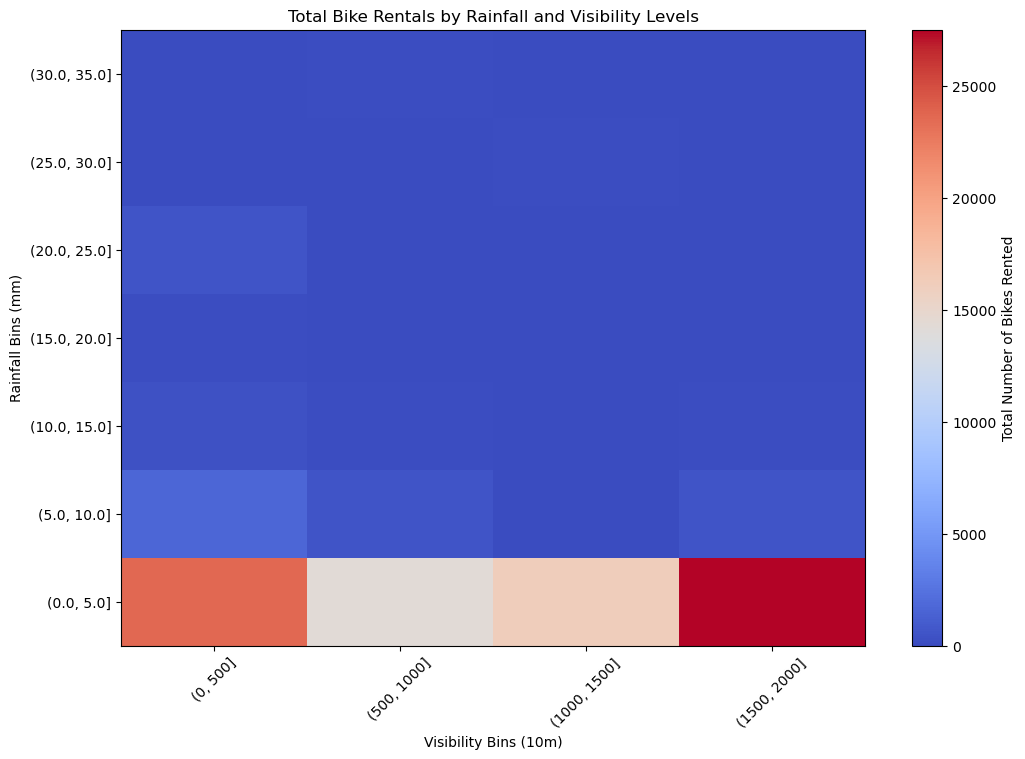

In [29]:
# 2D Heatmap with absolute rental values instead of averages

# Group and aggregate total rentals by binned rainfall and visibility
heatmap_data_abs = df.groupby(['Rainfall Binned', 'Visibility Binned'])['Rented Bike Count'].sum().unstack()

# Plot the heatmap with absolute rental values
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data_abs, aspect='auto', cmap='coolwarm', origin='lower')
plt.colorbar(label='Total Number of Bikes Rented')
plt.title("Total Bike Rentals by Rainfall and Visibility Levels")
plt.xlabel("Visibility Bins (10m)")
plt.ylabel("Rainfall Bins (mm)")
plt.xticks(ticks=np.arange(len(heatmap_data_abs.columns)), labels=heatmap_data_abs.columns, rotation=45)
plt.yticks(ticks=np.arange(len(heatmap_data_abs.index)), labels=heatmap_data_abs.index)
plt.grid(False)
plt.show()


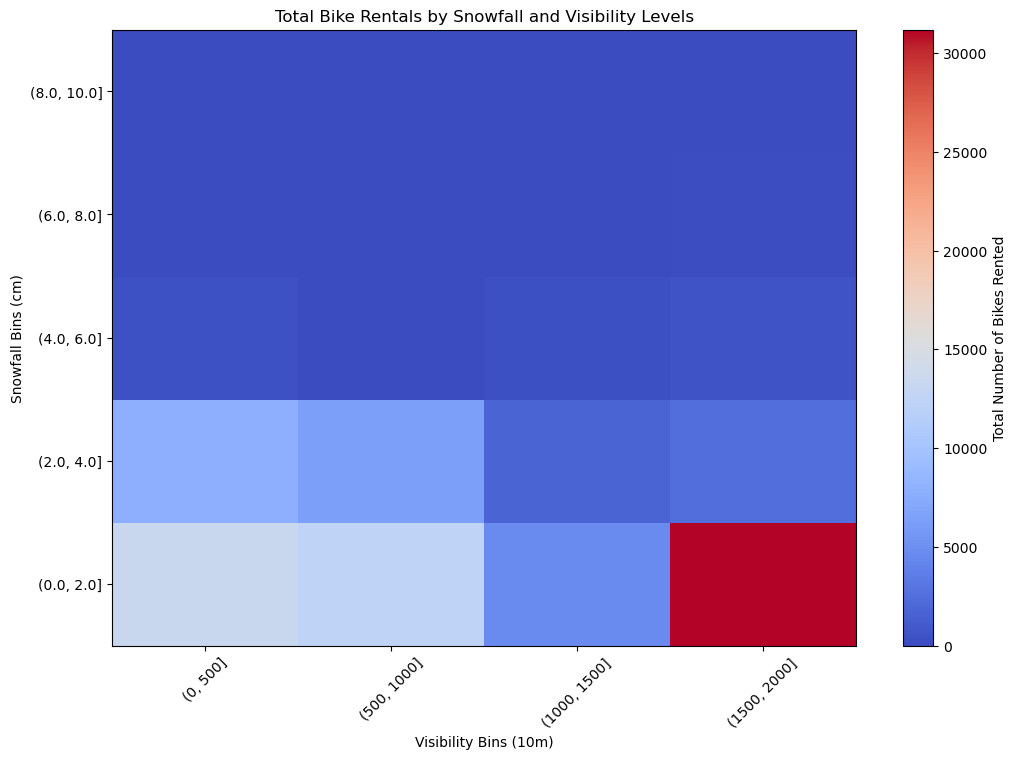

In [30]:
# Define bins for snowfall and visibility
snowfall_bins = np.arange(0, df['Snowfall (cm)'].max() + 2, 2)
visibility_bins = np.arange(0, df['Visibility (10m)'].max() + 500, 500)

# Bin the data by snowfall and visibility
df['Snowfall Binned'] = pd.cut(df['Snowfall (cm)'], bins=snowfall_bins)
df['Visibility Binned'] = pd.cut(df['Visibility (10m)'], bins=visibility_bins)

# Group and aggregate total rentals by binned snowfall and visibility
heatmap_data_snow = df.groupby(['Snowfall Binned', 'Visibility Binned'])['Rented Bike Count'].sum().unstack()

# Plot the heatmap with absolute rental values for snowfall and visibility
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data_snow, aspect='auto', cmap='coolwarm', origin='lower')
plt.colorbar(label='Total Number of Bikes Rented')
plt.title("Total Bike Rentals by Snowfall and Visibility Levels")
plt.xlabel("Visibility Bins (10m)")
plt.ylabel("Snowfall Bins (cm)")
plt.xticks(ticks=np.arange(len(heatmap_data_snow.columns)), labels=heatmap_data_snow.columns, rotation=45)
plt.yticks(ticks=np.arange(len(heatmap_data_snow.index)), labels=heatmap_data_snow.index)
plt.grid(False)
plt.show()
